In [1]:
# Plot

import matplotlib.pyplot as plt

import seaborn as sns

# Handle data

import pandas as pd

import numpy as np

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Import data

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Get the file path to the directory
file_path = '/content/drive/MyDrive/Project_data-science/feeds.csv'

#Import the file .csv from file_path
df = pd.read_csv(file_path)

Mounted at /content/drive


In [4]:
#remove and rename field

df = df.drop(['latitude', 'longitude', 'elevation', 'status', 'field8', 'entry_id'], axis=1)
df = df.rename(columns={'field1': 'pm1', 'field2': 'pm2.5', 'field3': 'pm10', 'field4': 'CO2', 'field5': 'temp of CO2 sensor', 'field6': 'humidity', 'field7': 'temp'})
df = df.rename(columns={'created_at': 'Date'})

#use 'created_at' for time

df['Date'] = pd.to_datetime(df['Date'],utc=True)
df['Date'] = df['Date'].dt.tz_convert('Europe/Rome')
df.set_index('Date', inplace=True)

In [68]:
df

,pm1,pm2.5,pm10,CO2,temp of CO2 sensor,humidity,temp
Date,,,,,,,
2022-01-31 18:04:37+01:00,17.0,24.0,24.0,1936.0,26.0,51.0,21.9
2022-01-31 18:06:17+01:00,17.0,24.0,24.0,1917.0,26.0,50.9,21.5
2022-01-31 18:07:58+01:00,17.0,24.0,24.0,2129.0,26.0,52.2,21.4
2022-01-31 18:09:38+01:00,17.0,24.0,24.0,1930.0,26.0,51.3,21.4
2022-01-31 18:11:25+01:00,17.0,24.0,24.0,2036.0,26.0,51.3,21.4
...,...,...,...,...,...,...,...
2024-07-16 08:39:44+02:00,NaN,NaN,NaN,644.0,33.0,46.4,28.5
2024-07-16 08:43:45+02:00,NaN,NaN,NaN,640.0,33.0,46.3,28.5
2024-07-16 08:47:46+02:00,NaN,NaN,NaN,700.0,33.0,46.4,28.5


## Show statistics

In [6]:
#data type of df

df.dtypes

,0
pm1,float64
pm2.5,float64
pm10,float64
CO2,float64
temp of CO2 sensor,float64
humidity,float64
temp,float64


In [7]:
df.describe()

,pm1,pm2.5,pm10,CO2,temp of CO2 sensor,humidity,temp
count,226121.000000,226107.000000,226103.000000,225196.000000,226102.000000,226105.000000,226107.000000
mean,228.984256,232.057849,233.532138,968.100792,26.419731,53.925876,22.379989
std,913.972339,913.296643,912.979291,557.694567,3.383835,9.512656,4.316606
min,0.000000,0.000000,0.000000,0.000000,-17.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,543.000000,24.000000,50.700000,20.300000
50%,6.000000,9.000000,10.000000,791.000000,25.000000,55.100000,21.200000
75%,13.000000,18.000000,20.000000,1237.000000,29.000000,59.100000,25.500000
max,4000.000000,4000.000000,4000.000000,4417.000000,36.000000,99.000000,32.600000


In [8]:
# Count NaNs
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count zeros
zero_counts = (df == 0).sum()
print("\nZero Counts:\n", zero_counts)

# Count negative values
negative_counts = (df < 0).sum()
print("\nNegative Value Counts:\n", negative_counts)

NaN Counts:
 pm1                    14
pm2.5                  28
pm10                   32
CO2                   939
temp of CO2 sensor     33
humidity               30
temp                   28
dtype: int64

Zero Counts:
 pm1                   49449
pm2.5                 47523
pm10                  46976
CO2                      31
temp of CO2 sensor        0
humidity               3908
temp                   3908
dtype: int64

Negative Value Counts:
 pm1                   0
pm2.5                 0
pm10                  0
CO2                   0
temp of CO2 sensor    1
humidity              0
temp                  0
dtype: int64


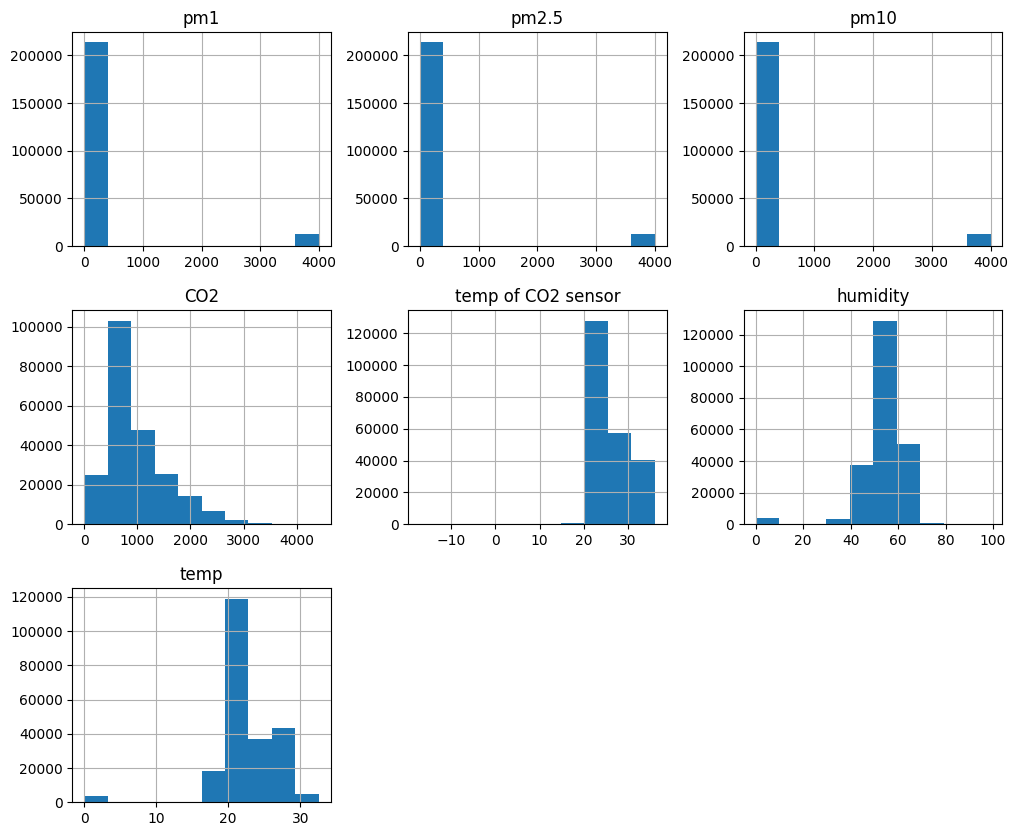

In [9]:
#plot the distribution of the value of df

df.hist(figsize=(12, 10))
plt.show()

# Cleaning data

In [10]:
# change all 0 in Nan value because sensors faults
df = df.replace(0, pd.NA)

## focus on CO2

In [11]:
# drop all the value of 'temp of CO2 sensor' that are df['temp'] < 5
# because the sensor contain a heater and 'temp' doesn't drop under 10°
df = df.drop(df[df['temp of CO2 sensor'] < 5].index)

# drop the row with 0 or Nan value in df['CO2']
df = df.dropna(subset=['CO2'])

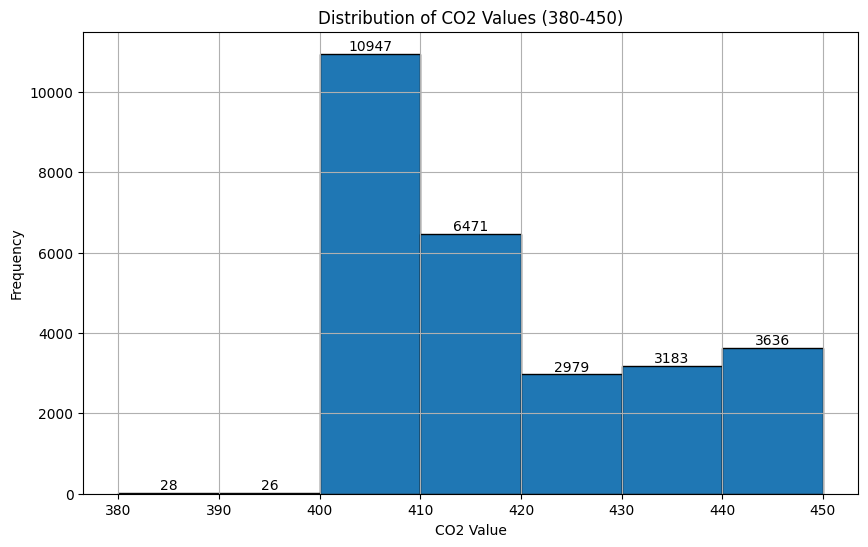

In [12]:
# Take a look of distribuction of co2 beetween 380 and 450

# histogram with specified bins
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['CO2'], bins=range(380, 451, 10), edgecolor='black')

# add labels
for i in range(len(n)):
  plt.text(bins[i] + 5, n[i], int(n[i]), ha='center', va='bottom')

plt.xlabel('CO2 Value')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Values (380-450)')
plt.grid(True)
plt.show()

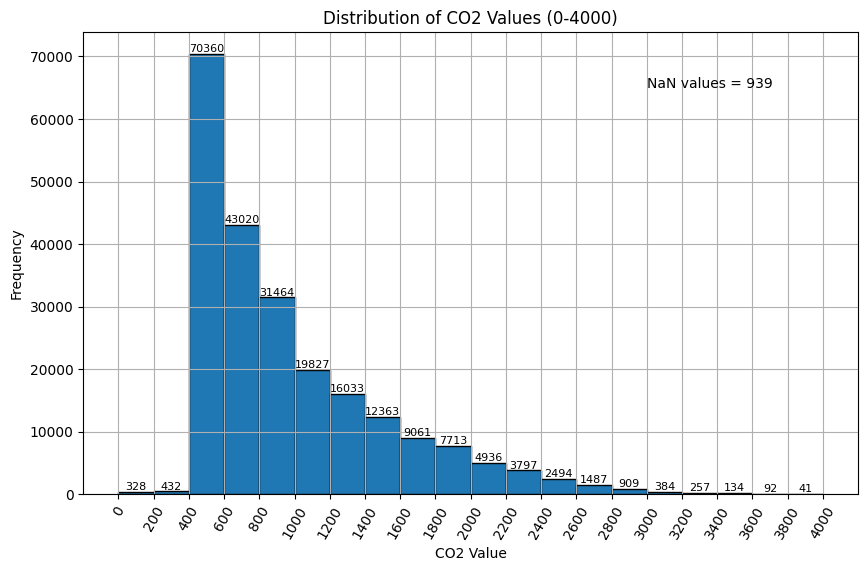

In [13]:
# full histogram

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['CO2'], bins=range(0, 4001, 200), edgecolor='black')

# add labels
for i in range(len(n)):
  plt.text(bins[i] + 100, n[i], int(n[i]), ha='center', va='bottom', fontsize=8)

plt.xlabel('CO2 Value')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Values (0-4000)')
plt.text(3000, 65000, "NaN values = 939")

plt.xticks(range(0, 4001, 200), rotation=60)

plt.grid(True)
plt.show()


In [14]:
# remove the row with CO2 value under 400 based on base CO2 concentration in atmosphere

df = df[df['CO2'] >= 400]

## focus on pm

Checked data from https://www.arpae.it/it/temi-ambientali/aria/dati-qualita-aria/stazioni-fisse and decided the filter for pm

In [16]:
# change all 4000 value in pm1 pm2.5 pm10 in Nan
df[['pm1', 'pm2.5', 'pm10']] = df[['pm1', 'pm2.5', 'pm10']].replace(4000, pd.NA)

# Replace 1 and 2 values in 'pm1', 'pm2.5', 'pm10' with NaN
df[['pm1', 'pm2.5', 'pm10']] = df[['pm1', 'pm2.5', 'pm10']].replace([1, 2], pd.NA)

In [17]:
# Propagate Nan over reading data with the same time

# Identify rows where any of the 'pm' columns have NaN
mask = df[['pm1', 'pm2.5', 'pm10']].isna().any(axis=1)

# Set NaN for all 'pm' columns in these rows
df.loc[mask, ['pm1', 'pm2.5', 'pm10']] = pd.NA

In [18]:
# Fix conversion type

print(df.dtypes)
print('\n')

#convert 'object' type columns to numeric:
for col in df.select_dtypes(include=['object']):
  try:
    df[col] = pd.to_numeric(df[col], errors='coerce')
  except:
    print(f"Could not convert column {col} to numeric.")

print(df.dtypes)


pm1                    object
pm2.5                  object
pm10                   object
CO2                    object
temp of CO2 sensor    float64
humidity               object
temp                   object
dtype: object


pm1                   float64
pm2.5                 float64
pm10                  float64
CO2                   float64
temp of CO2 sensor    float64
humidity              float64
temp                  float64
dtype: object


# Data analysis

In [19]:
# Count NaNs
nan_counts = df.isna().sum()
print("NaN Counts:\n", nan_counts)

# Count zeros
zero_counts = (df == 0).sum()
print("\nZero Counts:\n", zero_counts)

# Count negative values
negative_counts = (df < 0).sum()
print("\nNegative Value Counts:\n", negative_counts)

NaN Counts:
 pm1                   82427
pm2.5                 82427
pm10                  82427
CO2                       0
temp of CO2 sensor        0
humidity               3903
temp                   3903
dtype: int64

Zero Counts:
 pm1                   0
pm2.5                 0
pm10                  0
CO2                   0
temp of CO2 sensor    0
humidity              0
temp                  0
dtype: int64

Negative Value Counts:
 pm1                   0
pm2.5                 0
pm10                  0
CO2                   0
temp of CO2 sensor    0
humidity              0
temp                  0
dtype: int64


In [20]:
df

,pm1,pm2.5,pm10,CO2,temp of CO2 sensor,humidity,temp
Date,,,,,,,
2022-01-31 18:04:37+01:00,17.0,24.0,24.0,1936.0,26.0,51.0,21.9
2022-01-31 18:06:17+01:00,17.0,24.0,24.0,1917.0,26.0,50.9,21.5
2022-01-31 18:07:58+01:00,17.0,24.0,24.0,2129.0,26.0,52.2,21.4
2022-01-31 18:09:38+01:00,17.0,24.0,24.0,1930.0,26.0,51.3,21.4
2022-01-31 18:11:25+01:00,17.0,24.0,24.0,2036.0,26.0,51.3,21.4
...,...,...,...,...,...,...,...
2024-07-16 08:39:44+02:00,NaN,NaN,NaN,644.0,33.0,46.4,28.5
2024-07-16 08:43:45+02:00,NaN,NaN,NaN,640.0,33.0,46.3,28.5
2024-07-16 08:47:46+02:00,NaN,NaN,NaN,700.0,33.0,46.4,28.5


In [21]:
df.dtypes

,0
pm1,float64
pm2.5,float64
pm10,float64
CO2,float64
temp of CO2 sensor,float64
humidity,float64
temp,float64


In [22]:
df.describe()

,pm1,pm2.5,pm10,CO2,temp of CO2 sensor,humidity,temp
count,141978.000000,141978.000000,141978.000000,224405.000000,224405.000000,220502.00000,220502.000000
mean,10.919952,15.626266,17.882940,970.772576,26.422165,54.92032,22.773187
std,7.226349,11.270289,13.930945,556.812036,3.367608,6.30004,3.147857
min,3.000000,3.000000,3.000000,400.000000,14.000000,23.00000,12.900000
25%,6.000000,8.000000,9.000000,545.000000,24.000000,51.10000,20.300000
50%,9.000000,13.000000,14.000000,793.000000,25.000000,55.30000,21.300000
75%,14.000000,20.000000,22.000000,1240.000000,29.000000,59.20000,25.600000
max,157.000000,269.000000,521.000000,4417.000000,36.000000,99.00000,32.600000


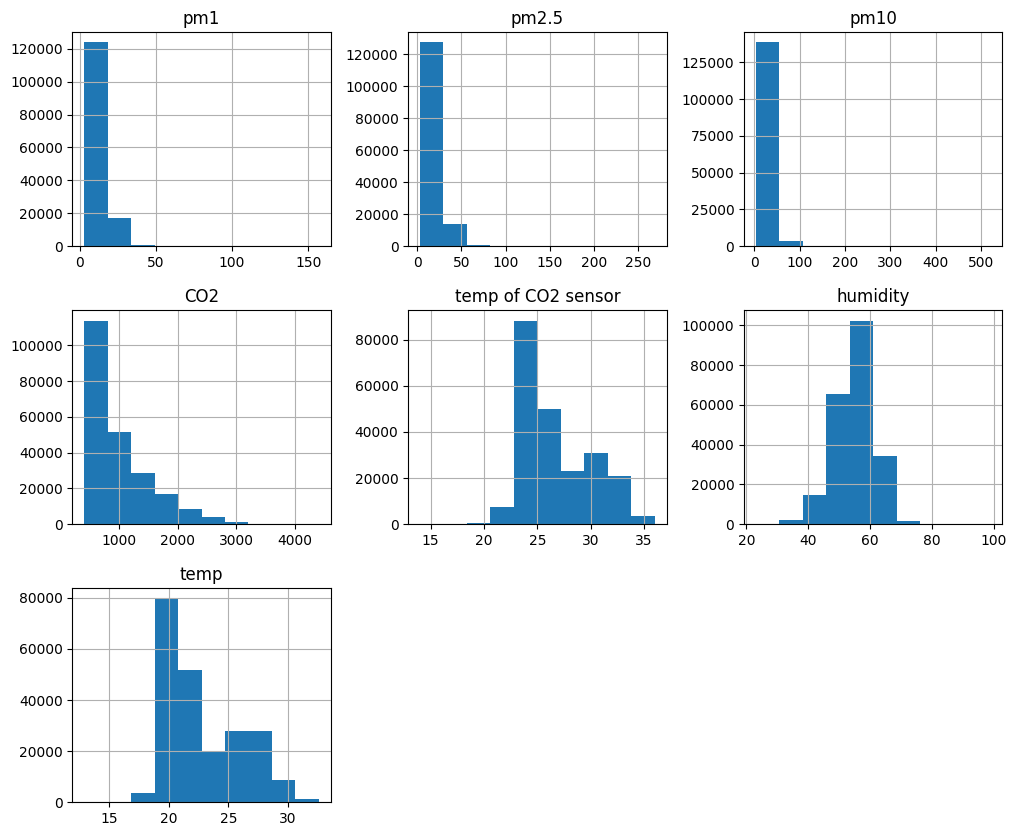

In [23]:
# plot distribution

df.hist(figsize=(12, 10))
plt.show()

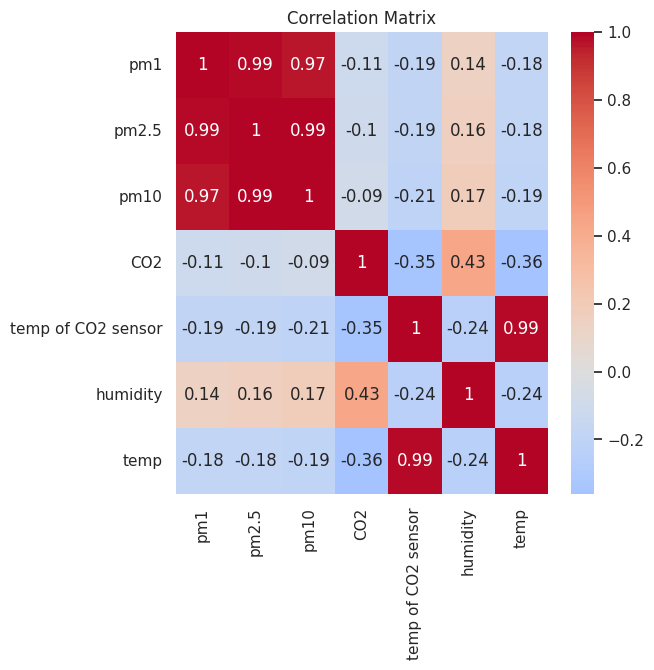

In [66]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# plot
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

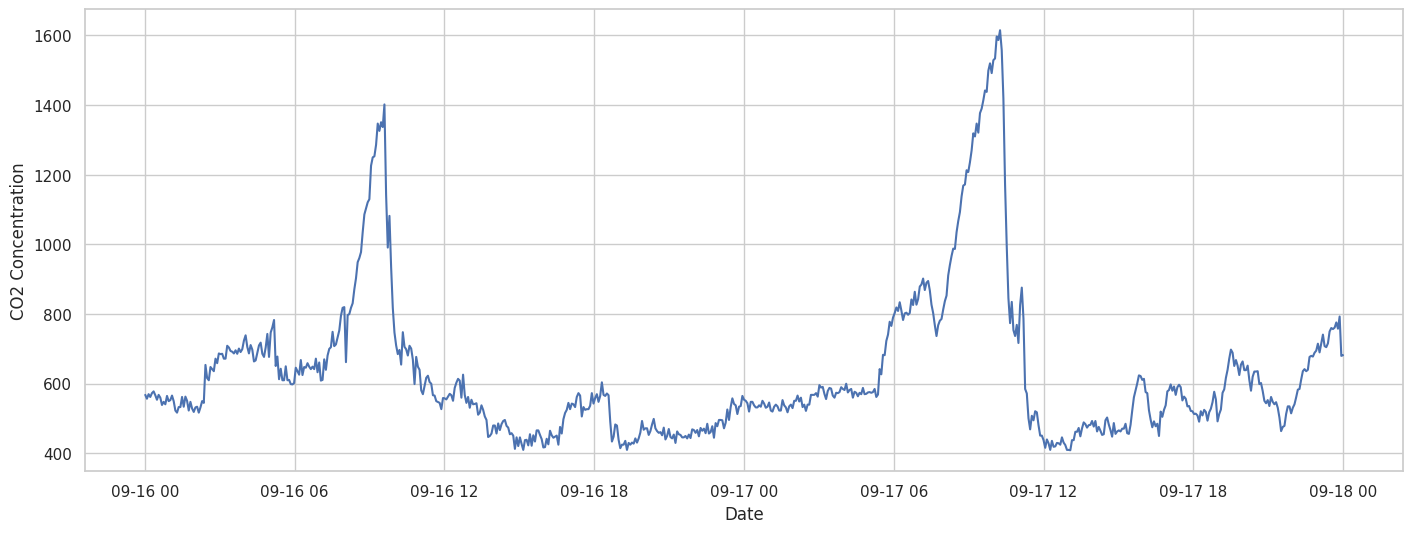

In [49]:
#Plot co2 data

# Select the date range
start_date = '2023-09-16'
end_date = '2023-09-17'
ex_co2 = df['CO2'][start_date:end_date]

# Plot the CO2 data
plt.figure(figsize=(17, 6))
plt.plot(ex_co2.index, ex_co2.values)

plt.xlabel('Date')
plt.ylabel('CO2 Concentration')
plt.grid(True)
plt.show()


# Forecast

In [27]:
# Create a new DataFrame with only 'Date' and 'CO2' columns
df_co2 = df[['CO2']].copy()

In [28]:
df_co2

,CO2
Date,
2022-01-31 18:04:37+01:00,1936.0
2022-01-31 18:06:17+01:00,1917.0
2022-01-31 18:07:58+01:00,2129.0
2022-01-31 18:09:38+01:00,1930.0
2022-01-31 18:11:25+01:00,2036.0
...,...
2024-07-16 08:39:44+02:00,644.0
2024-07-16 08:43:45+02:00,640.0
2024-07-16 08:47:46+02:00,700.0


In [29]:
# Set parameters for forecast

W = 60 # minute past data
F = 20 # minute time forecast

tot_window = str(W + F) + 'min'

In [30]:
# Resample the data over tot time and print the distribuction

sample_object = df_co2.resample(tot_window) # Find 0 value due inactivy period sliced

print(sample_object.size().value_counts())

# Create a list with new sample time

tot_sample_list = df_co2.resample(tot_window).agg(list)

20    8936
0     4709
19    2002
18     235
17      41
21      26
16      20
15      16
14      15
12      15
11      14
9       13
13      13
1       11
7       10
10      10
8        9
2        8
4        8
6        6
3        6
22       5
5        3
46       1
40       1
30       1
44       1
26       1
47       1
23       1
48       1
Name: count, dtype: int64


In [31]:
tot_sample_list

,CO2
Date,
2022-01-31 17:20:00+01:00,"[1936.0, 1917.0, 2129.0, 1930.0, 2036.0, 2165...."
2022-01-31 18:40:00+01:00,"[2413.0, 2473.0, 2143.0, 2212.0, 1902.0, 1909...."
2022-01-31 20:00:00+01:00,"[1505.0, 1493.0, 1535.0, 1587.0, 1549.0, 1555...."
2022-01-31 21:20:00+01:00,"[1884.0, 1905.0, 1875.0, 1922.0, 1937.0, 1925...."
2022-01-31 22:40:00+01:00,"[1744.0, 1705.0, 1516.0, 1549.0, 1624.0, 1517...."
...,...
2024-07-16 02:20:00+02:00,"[523.0, 519.0, 498.0, 483.0, 502.0, 499.0, 500..."
2024-07-16 03:40:00+02:00,"[499.0, 485.0, 640.0, 627.0, 550.0, 565.0, 595..."
2024-07-16 05:00:00+02:00,"[661.0, 638.0, 668.0, 676.0, 712.0, 683.0, 675..."


In [32]:
# Extract dataset lists

# Extract lists with length 20
df_20 = tot_sample_list[tot_sample_list['CO2'].apply(len) == 20]

# Extract lists with length 19
df_19 = tot_sample_list[tot_sample_list['CO2'].apply(len) == 19]

# Create the final list
filtered_list = list()

In [33]:
# Convert the list df_20 to a Pandas Series

for index, row in df_20.iterrows():

  co2_series = pd.Series(row['CO2'])

  filtered_list.append(co2_series)

In [34]:
# Convert the list df_19 to Pandas Series and Iinterpolate a new first value

for index, row in df_19.iterrows():
  # Convert the list to a Pandas Series
  co2_series = pd.Series(row['CO2'])

  # Iinterpolate on the Series
  interpolated_value = co2_series.interpolate(method='linear',limit_direction='both').iloc[0]

  # Insert the interpolated value at the beginning of the Series
  co2_series = pd.concat([pd.Series([interpolated_value]), co2_series])

  # Reset the index of the Series
  co2_series = co2_series.reset_index(drop=True)

  # update the DataFrame directly with the modified list
  #df_19.at[index, 'CO2'] = co2_series

  filtered_list.append(co2_series)

In [50]:
len(filtered_list)

10938

In [35]:
# Check and print if it doesn't well

for i in filtered_list:
  if len(i) != 20:
    print(len(i))

In [36]:
# Create Input Features and target

X = []
y = []

for i in filtered_list:
  X.append(i[:15].tolist())
  y.append(i[-1:])

# Create Train set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

X_train = np.array(X_train)
y_train = np.array(y_train).ravel()
X_test = np.array(X_test)
y_test = np.array(y_test).ravel()

In [52]:
len(X[0])

15

## KNN, Random Forest, Linear Regressor

In [37]:
print("*** KNN Regression ***")

KNN_results = []
for n in range(1, 31):
  clf = KNeighborsRegressor(n_neighbors=n)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  KNN_results.append(mean_absolute_error(y_test, y_pred))
  print(f'For N = {n} = ' ,mean_absolute_error(y_test, y_pred))

print("\n*** Random Forest ***")
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

print("\n*** Linear Regression ***")
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

*** KNN Regression ***
For N = 1 =  118.70840950639854
For N = 2 =  106.06535648994516
For N = 3 =  103.33622790981109
For N = 4 =  101.47029250457038
For N = 5 =  99.822760511883
For N = 6 =  99.40912553321147
For N = 7 =  98.69724471141289
For N = 8 =  98.30832952468008
For N = 9 =  97.57048547633556
For N = 10 =  97.20246800731262
For N = 11 =  97.37547781286355
For N = 12 =  97.32529707495429
For N = 13 =  97.63204893826466
For N = 14 =  97.28920736484723
For N = 15 =  97.28031687995126
For N = 16 =  97.06358546617916
For N = 17 =  96.83033121841056
For N = 18 =  96.8021531586431
For N = 19 =  96.95662946213798
For N = 20 =  96.94362431444242
For N = 21 =  96.81570470967179
For N = 22 =  96.70886654478976
For N = 23 =  96.59591844845401
For N = 24 =  96.38720673369896
For N = 25 =  96.30266910420477
For N = 26 =  96.26100407818873
For N = 27 =  96.02916582029928
For N = 28 =  96.49407482371376
For N = 29 =  96.55508100611486
For N = 30 =  96.57266910420475

*** Random Forest ***
90

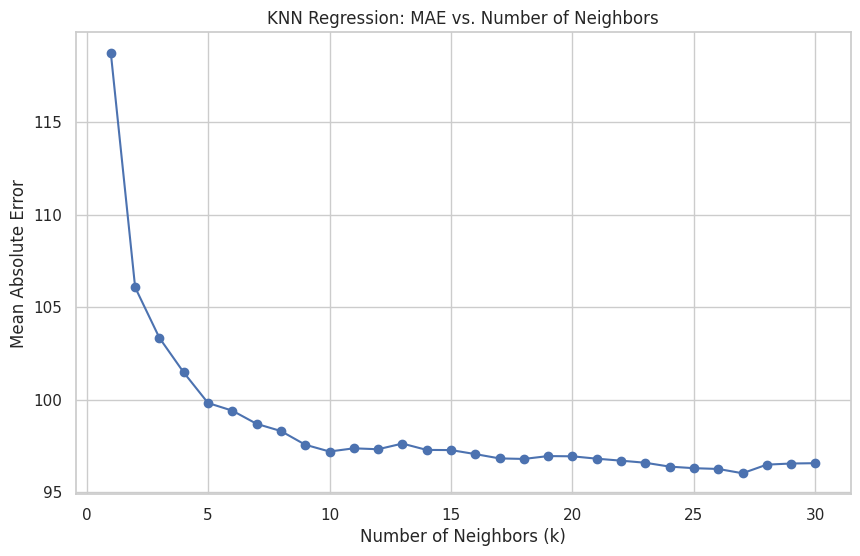

Optimal number of neighbors (k): 27
Minimum MAE: 96.02916582029928


In [38]:
# Plot KNN_results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), KNN_results, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error')
plt.title('KNN Regression: MAE vs. Number of Neighbors')
plt.grid(True)
plt.show()

# Find the optimal number of neighbors
optimal_k = np.argmin(KNN_results) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")
print(f"Minimum MAE: {min(KNN_results)}")


## Plotting

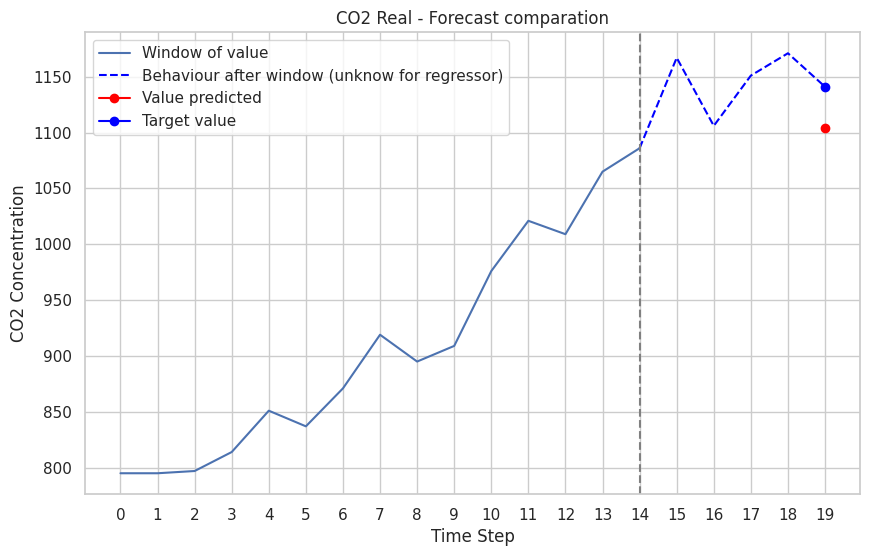

In [64]:
# Find the index of X_test[index_test] in the filtered_list

index_test = 20

index_to_print = 0

for i in range(len(filtered_list)):
  # Use np.array_equal to compare arrays
  if np.array_equal(filtered_list[i][:15].tolist(), X_test[index_test]):
    index_to_print = i

#print(index_to_print)

# Use the last predictor for compute the prediction (linear regressor)

y_pred = clf.predict([X_test[index_test]])

full_data = filtered_list[index_to_print]

# Plot the data

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.xticks(range(len(full_data)))

# Plot data up to index 14
plt.plot(full_data.index[:15], full_data.values[:15], label='Window of value')
plt.plot(full_data.index[14:], full_data.values[14:], color='blue', linestyle='--', label='Behaviour after window (unknow for regressor)')

# Vertical line
plt.axvline(x=14, color='grey', linestyle='--')

# Add a dot at y_pred
plt.plot(19, y_pred[0], marker='o', color='red', label='Value predicted')
plt.plot(19, full_data[19], marker='o', color='blue', label='Target value')


# Set labels and title
plt.xlabel('Time Step')
plt.ylabel('CO2 Concentration')
plt.title('CO2 Real - Forecast comparation')

# Show the plot
plt.legend()
plt.show()

## Neural Network Regressor

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=0, shuffle=False)

X_train = np.array(X_train)
y_train = np.array(y_train).ravel()
X_val = np.array(X_val)
y_val = np.array(y_val).ravel()
X_test = np.array(X_test)
y_test = np.array(y_test).ravel()

model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],)))
model.add(Dense(20))
model.add(Dense(1, activation='linear'))

es = EarlyStopping(monitor='val_loss', patience=20)

model.compile(loss='mean_squared_error', optimizer='adam',
metrics=['mean_squared_error'])

print('Training')

model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_val, y_val), callbacks=[es], verbose=False)

print('\nTesting 1')

# loss and MSE
test_loss, test_mse = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Mean Squared Error: {test_mse}")

print('\nTesting 2')

# MAE
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MAE : {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training

Testing 1
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35712.3516 - mean_squared_error: 35712.3516
Test Loss: 34066.9609375, Test Mean Squared Error: 34066.9609375

Testing 2
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test MAE : 89.10867379308837
